In [ ]:
#数据整理
#也不多选，选择1000个产品，或者几百个，每天都有数据那种，切削量前1000的进行分析预测。




#对于度量有两种方式，方式一，用某种公式度量，方式二，用某个模型或曲线去拟合，得出的系数用来做度量方式


#对于编码，可以度量相似性，二可一让序列自己做差，然后求每天的增长率。再去用相应的函数度量。

In [1]:
import pandas as pd
import numpy as np


In [2]:
path_b = 'b'#b榜数据集
path_i = path_b + '/goodsale.csv'
goodsale = pd.read_csv(path_i)
goodsale.data_date = pd.to_datetime(goodsale.data_date.astype(str))
# goodsale = goodsale.sort_values('data_date')
goodsale

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,data_date,goods_id,sku_id,goods_num,goods_price,orginal_shop_price
0,2017-05-18,GIxOHa,SKg8D0d7,1,1.99,1.99
1,2017-11-30,GrXpTc,SKq3pF8j,6,29.99,37.99
2,2017-10-19,G3ORTV,SKIwiWXl,1,6.99,11.99
3,2017-05-31,GDRp2b,SKRNl1oL,1,16.99,21.99
4,2017-06-10,GHulZo,SKtD5qKW,1,5.99,5.99
...,...,...,...,...,...,...
12918274,2017-07-07,Gj7VIq,SKDVvB5b,2,11.99,21.99
12918275,2017-12-24,Gf0MHX,SKTfz6mL,2,26.49,45.99
12918276,2017-11-21,GLonSQ,SKt4jxGp,1,10.99,19.99
12918277,2017-06-19,GdKSGI,SKTU3S5V,4,7.99,13.99


In [4]:
goodsale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12918279 entries, 0 to 12918278
Data columns (total 6 columns):
 #   Column              Dtype         
---  ------              -----         
 0   data_date           datetime64[ns]
 1   goods_id            object        
 2   sku_id              object        
 3   goods_num           int64         
 4   goods_price         object        
 5   orginal_shop_price  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 591.4+ MB


In [3]:
data_sum = goodsale.groupby('sku_id').goods_num.agg(['sum','count'])
data_sum

,sum,count
sku_id,,
SK012MIL,10,8
SK012nhZ,1,1
SK012nxc,1,1
SK01348G,2,2
SK013VxM,21,5
...,...,...
SKzywlcu,1,1
SKzyxFmT,2,2
SKzyxQqc,1,1


In [7]:
#数据处理
data_list_choose = data_sum.sort_values(['count','sum'],ascending=False).head(500).index
data_list_choose

Index(['SKAqfgPE', 'SKdnwT2p', 'SKpdsITl', 'SKRHlgOj', 'SKpXC2rM', 'SKb4n6Tp',
       'SKtAxaMm', 'SKtIB4Qu', 'SKno5OH3', 'SKJjvuOZ',
       ...
       'SKIX4hoC', 'SKLeUHr1', 'SKS3w7iH', 'SKVNROdZ', 'SKRAGB6O', 'SKoFVdpg',
       'SK6IRUaW', 'SKsfJeSh', 'SK0hbgwu', 'SK3OinkG'],
      dtype='object', name='sku_id', length=500)

In [9]:
data_out = goodsale[goodsale.sku_id.isin(data_list_choose)]
data_out

,data_date,goods_id,sku_id,goods_num,goods_price,orginal_shop_price
125,2017-04-01,GCAnua,SKFzRe1q,14,6.99,9.99
132,2017-12-20,GgJ6iG,SKvHiGX0,2,8.99,13.99
312,2017-12-16,GfBVMY,SKp5eRlS,5,2.59,2.99
449,2017-07-26,GR91Ba,SKFVnIjB,1,8.99,12.99
478,2017-09-29,GyFZLU,SK4mI9wR,8,4.99,7.99
...,...,...,...,...,...,...
12918075,2017-06-21,Gn3yXv,SKl2dUq7,3,2.99,9.99
12918127,2017-03-14,GZm7Xk,SKiZaFp8,12,1.0,1.0
12918140,2017-09-12,GASq5L,SKdhJGbu,3,17.99,26.99
12918217,2017-04-28,Gvrch6,SKG2MFIt,24,1.99,1.99


In [11]:
data_out.to_csv('goodsale_top500.csv',index=None)

In [2]:
import pandas as pd
import numpy as np
#获取筛选后的数据
data_sale = pd.read_csv('goodsale_top500.csv')
data_sale.data_date = pd.to_datetime(data_sale.data_date)
data_sale

,data_date,goods_id,sku_id,goods_num,goods_price,orginal_shop_price
0,2017-04-01,GCAnua,SKFzRe1q,14,6.99,9.99
1,2017-12-20,GgJ6iG,SKvHiGX0,2,8.99,13.99
2,2017-12-16,GfBVMY,SKp5eRlS,5,2.59,2.99
3,2017-07-26,GR91Ba,SKFVnIjB,1,8.99,12.99
4,2017-09-29,GyFZLU,SK4mI9wR,8,4.99,7.99
...,...,...,...,...,...,...
173660,2017-06-21,Gn3yXv,SKl2dUq7,3,2.99,9.99
173661,2017-03-14,GZm7Xk,SKiZaFp8,12,1.00,1.00
173662,2017-09-12,GASq5L,SKdhJGbu,3,17.99,26.99
173663,2017-04-28,Gvrch6,SKG2MFIt,24,1.99,1.99


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# libraries & dataset
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False 
sns.set(style="darkgrid")


#可视化，一个或多个sku_names单元
def plot_sku_ids(data,choose_params=None,sku_names=None,sort_cols=None,col_show='goods_num',show_range=[]):
    '''
    choose_params:数据筛选的数据['TurbID', 'Day', 'Tmstamp']
    sku_names:需要画的sku_id组合
    sort_cols:按什么列排序['TurbID', 'Day', 'Tmstamp']
    show_range:展示范围 [144*200,144*202]
    ,col_show:显示的列
    '''
    if choose_params is None:data_choose = data
    else:
        choose_str = ""
        for key,value in choose_params.items():
            choose_str += key+f"=={value}" if choose_str=="" else " and "+key+f"=={value}"
        data_choose = data.query(choose_str).reset_index(drop=True)
    if sort_cols is None:pass
    else:pass
    length = data_choose.shape[0]
    if len(show_range)==2:
        range_choose = range(show_range[0],show_range[1])
        data_choose = data_choose.iloc[show_range[0]:show_range[1],:]
    else:range_choose = range(length) 
    plt.figure(figsize=(24,10))
    for col in sku_names:
        data_choose_i = data_choose.query(f'sku_id=="{col}"')
        data_choose_i = data_choose_i.sort_values('data_date')
        range_choose = data_choose_i.data_date
        if data_choose_i.shape[0]>0:
            plt.plot(range_choose, data_choose_i[col_show],label=col)
    plt.xlabel('time')
    plt.ylabel('value')
    plt.title(col_show)
    plt.legend(fontsize=16)  # 展示图例legend
    plt.show()
     

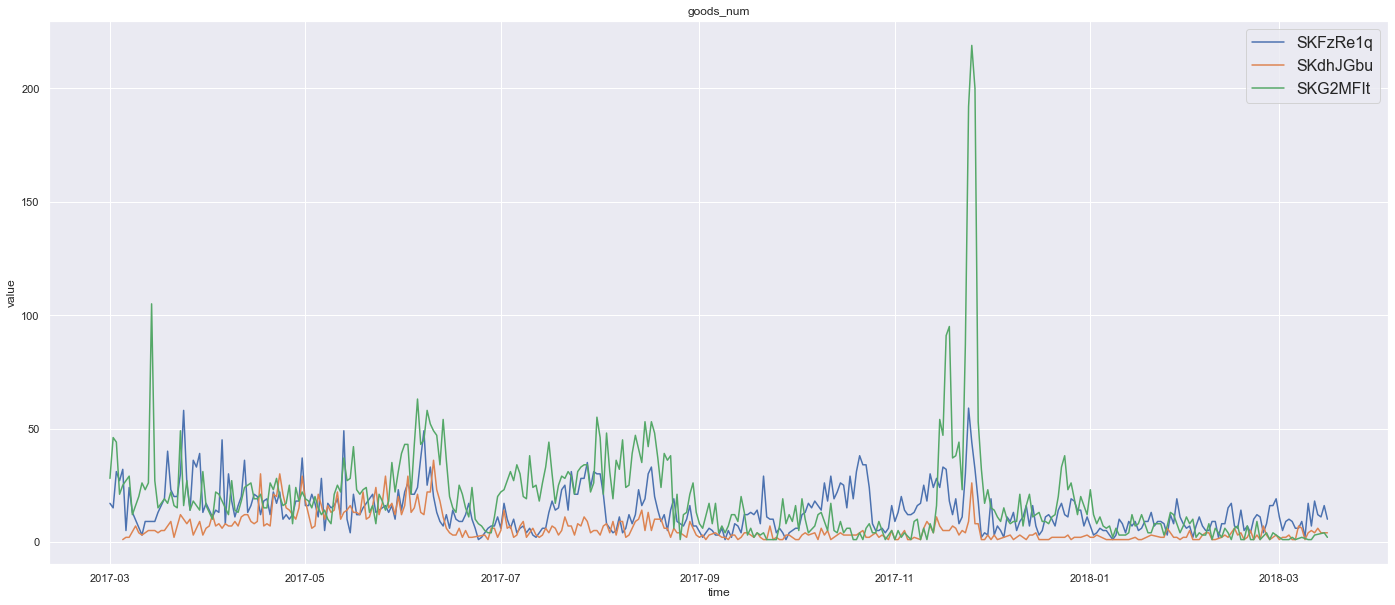

In [4]:
plot_sku_ids(data_sale,sku_names=['SKFzRe1q','SKdhJGbu','SKG2MFIt'])

In [19]:
#measurement
# data_pivot = data.pivot()
import math
def cos(array1, array2):
    norm1 = math.sqrt(sum(list(map(lambda x: math.pow(x, 2), array1))))
    norm2 = math.sqrt(sum(list(map(lambda x: math.pow(x, 2), array2))))
    return sum([array1[i]*array2[i] for i in range(0, len(array1))]) / (norm1 * norm2)

def measurement(data,method='corr',col_value = 'goods_num'):
    '''
    data:销售数据
    method:选择的度量方法
    col_value:显示的数据
    '''
    
    sku_goods = data.sku_id.unique()
    data=data.pivot(index='data_date', columns='sku_id', values=col_value)    
    data = data.sort_values('data_date')
    nums = len(sku_goods)
    out = pd.DataFrame(columns=['sku1','sku2','score'])
    if method!='corr':
        data = data.fillna(0)
    for i in range(nums):
        for j in range(i+1,nums):
            if method=='corr':
                score = data[[sku_goods[i],sku_goods[j]]].corr().iloc[0,1]
            elif method == 'cos':
                score = cos(data[sku_goods[i]],data[sku_goods[j]])
            out_i = pd.DataFrame([[sku_goods[i],sku_goods[j],score]],columns=['sku1','sku2','score'])
            out = pd.concat([out,out_i])
    return out.reset_index(drop=True)
            
    
    

In [20]:
data_corr = measurement(data_sale,method='cos')
data_corr.sort_values('score')

,sku1,sku2,score
38826,SKgrWMYt,SKWlaFbz,0.083841
38592,SKgrWMYt,SK74VSmh,0.090080
38579,SKgrWMYt,SKyUpH3i,0.092444
38468,SKgrWMYt,SKBlFdGK,0.099648
63605,SKeLMClT,SK1wFfrj,0.106952
...,...,...,...
78397,SKobTZtM,SKhicsVn,0.969199
69517,SKzvpYnc,SKproiEq,0.971402
13250,SKYqd4xg,SKMqL8DF,0.976493
13305,SKYqd4xg,SKFLJ9x0,0.982349


In [16]:
data_corr.to_csv('corr_result.csv',index=None)

In [21]:
data_corr.to_csv('cos_result.csv',index=None)

In [23]:
data_corr1 = pd.read_csv('corr_result.csv')

In [24]:
data_corr = data_corr1.merge(data_corr,how='left',on=['sku1','sku2'])